# Baseball Case Study

## Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.columns = ['wins', 'Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases','Runs Allowed','Earned Runs','Earned Run Average (ERA)',' Complete Games ','Shutouts','Saves','Errors']
df.columns 

Index(['wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', ' Complete Games ', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

In [6]:
df.head()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Data Inspection

In [7]:
df.shape

(30, 17)

As said above we have 30 rows and 17 columns in baseball data-set

In [8]:
df.describe()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
df.apply(lambda x: sum(x.isnull()))

wins                        0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
 Complete Games             0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0] *100

wins                        0.0
Runs                        0.0
At Bats                     0.0
Hits                        0.0
Doubles                     0.0
Triples                     0.0
Homeruns                    0.0
Walks                       0.0
Strikeouts                  0.0
Stolen Bases                0.0
Runs Allowed                0.0
Earned Runs                 0.0
Earned Run Average (ERA)    0.0
 Complete Games             0.0
Shutouts                    0.0
Saves                       0.0
Errors                      0.0
dtype: float64

As we see above all, we don't have any null or missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13   Complete Games           30 non-null     int64  
 14  Shutouts    

In [12]:
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Numerical Features in Train Set: 17


In [13]:
df.columns

Index(['wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', ' Complete Games ', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

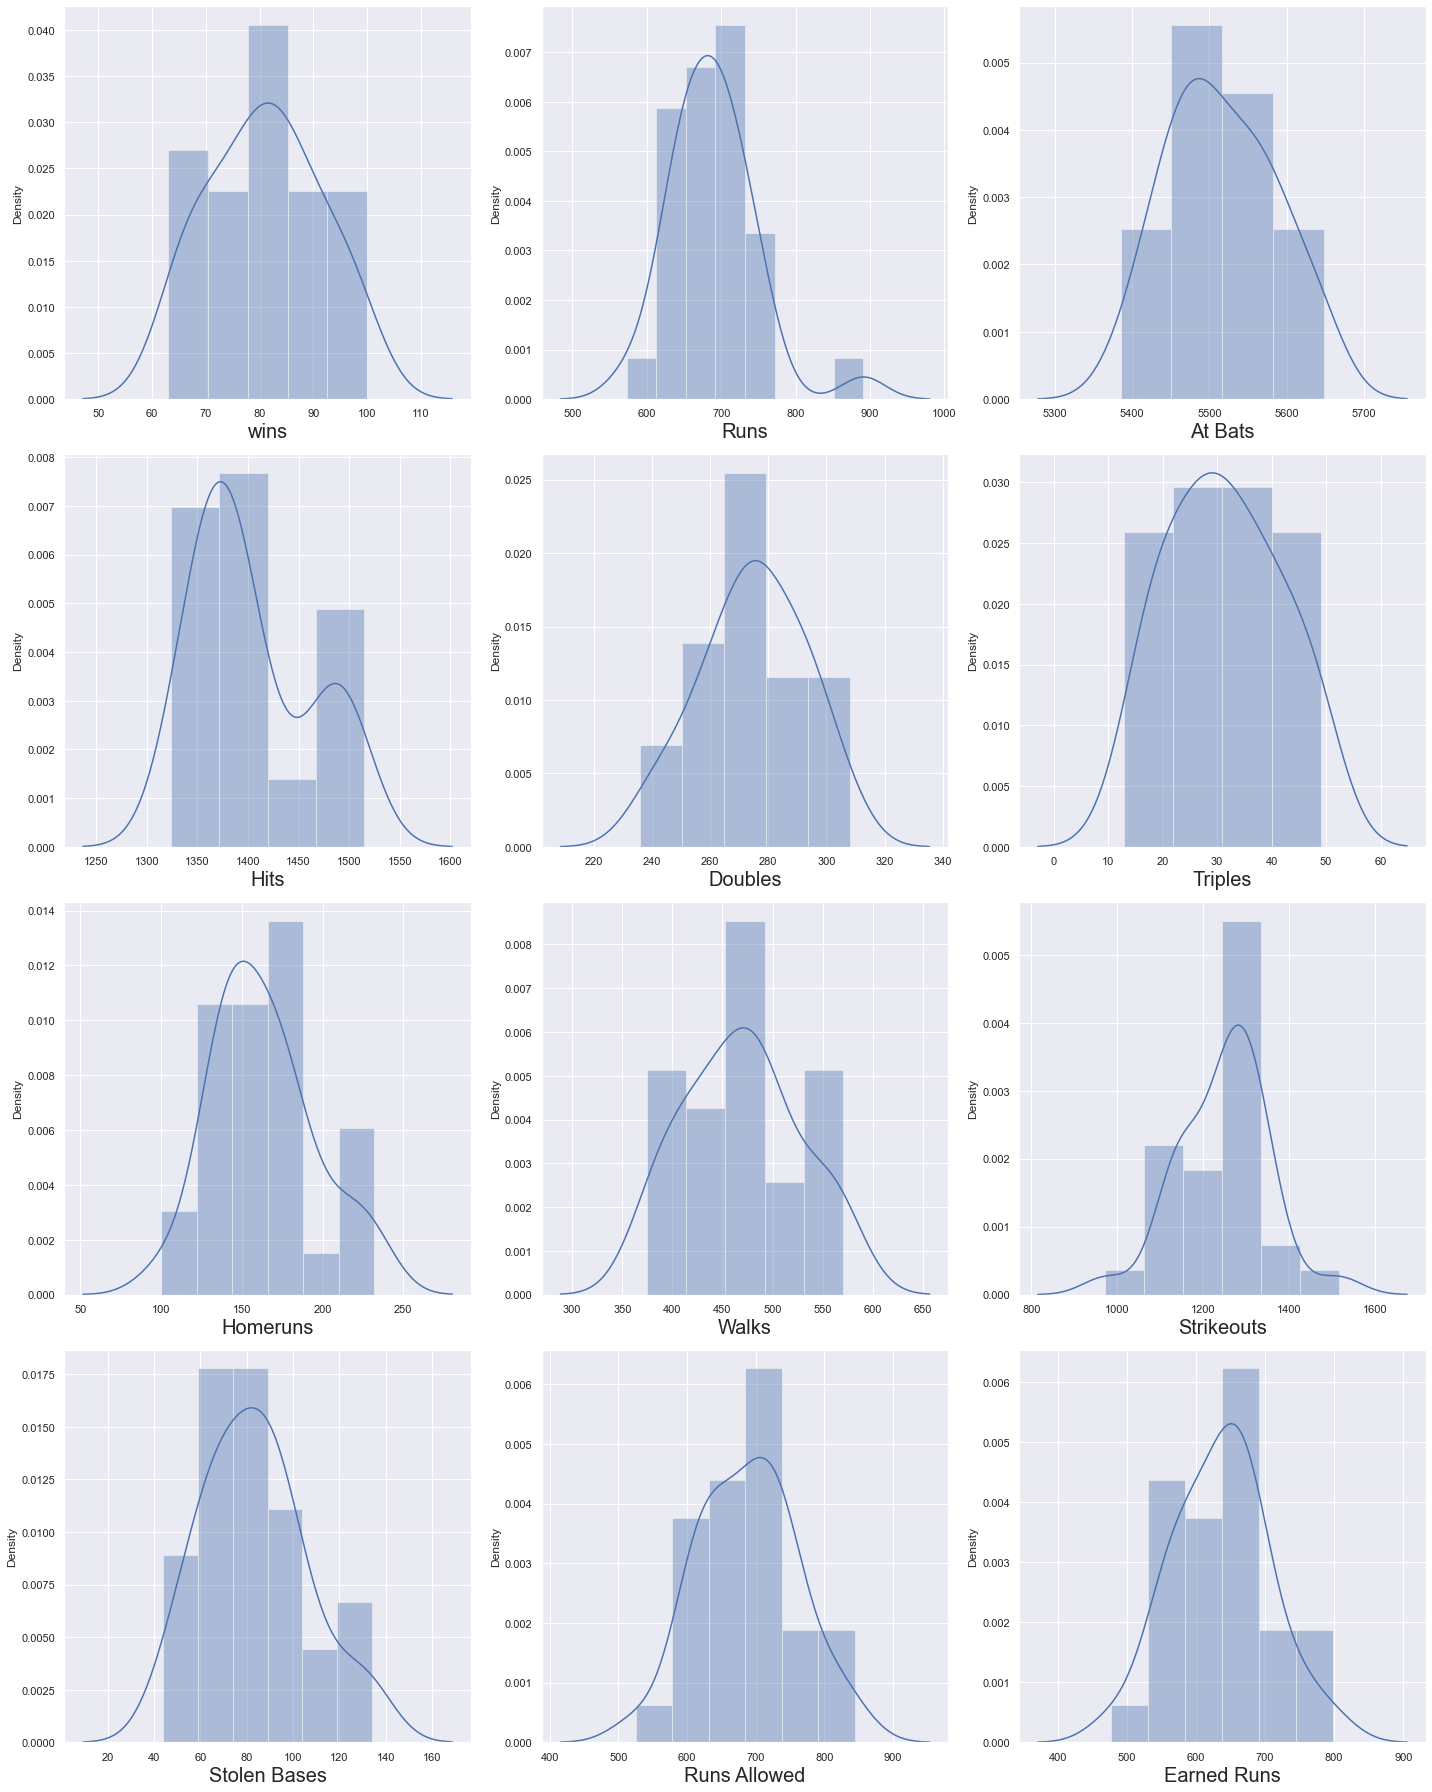

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax =plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)         
  
    plotnumber+=1
plt.tight_layout()     
plt.show()

<AxesSubplot:>

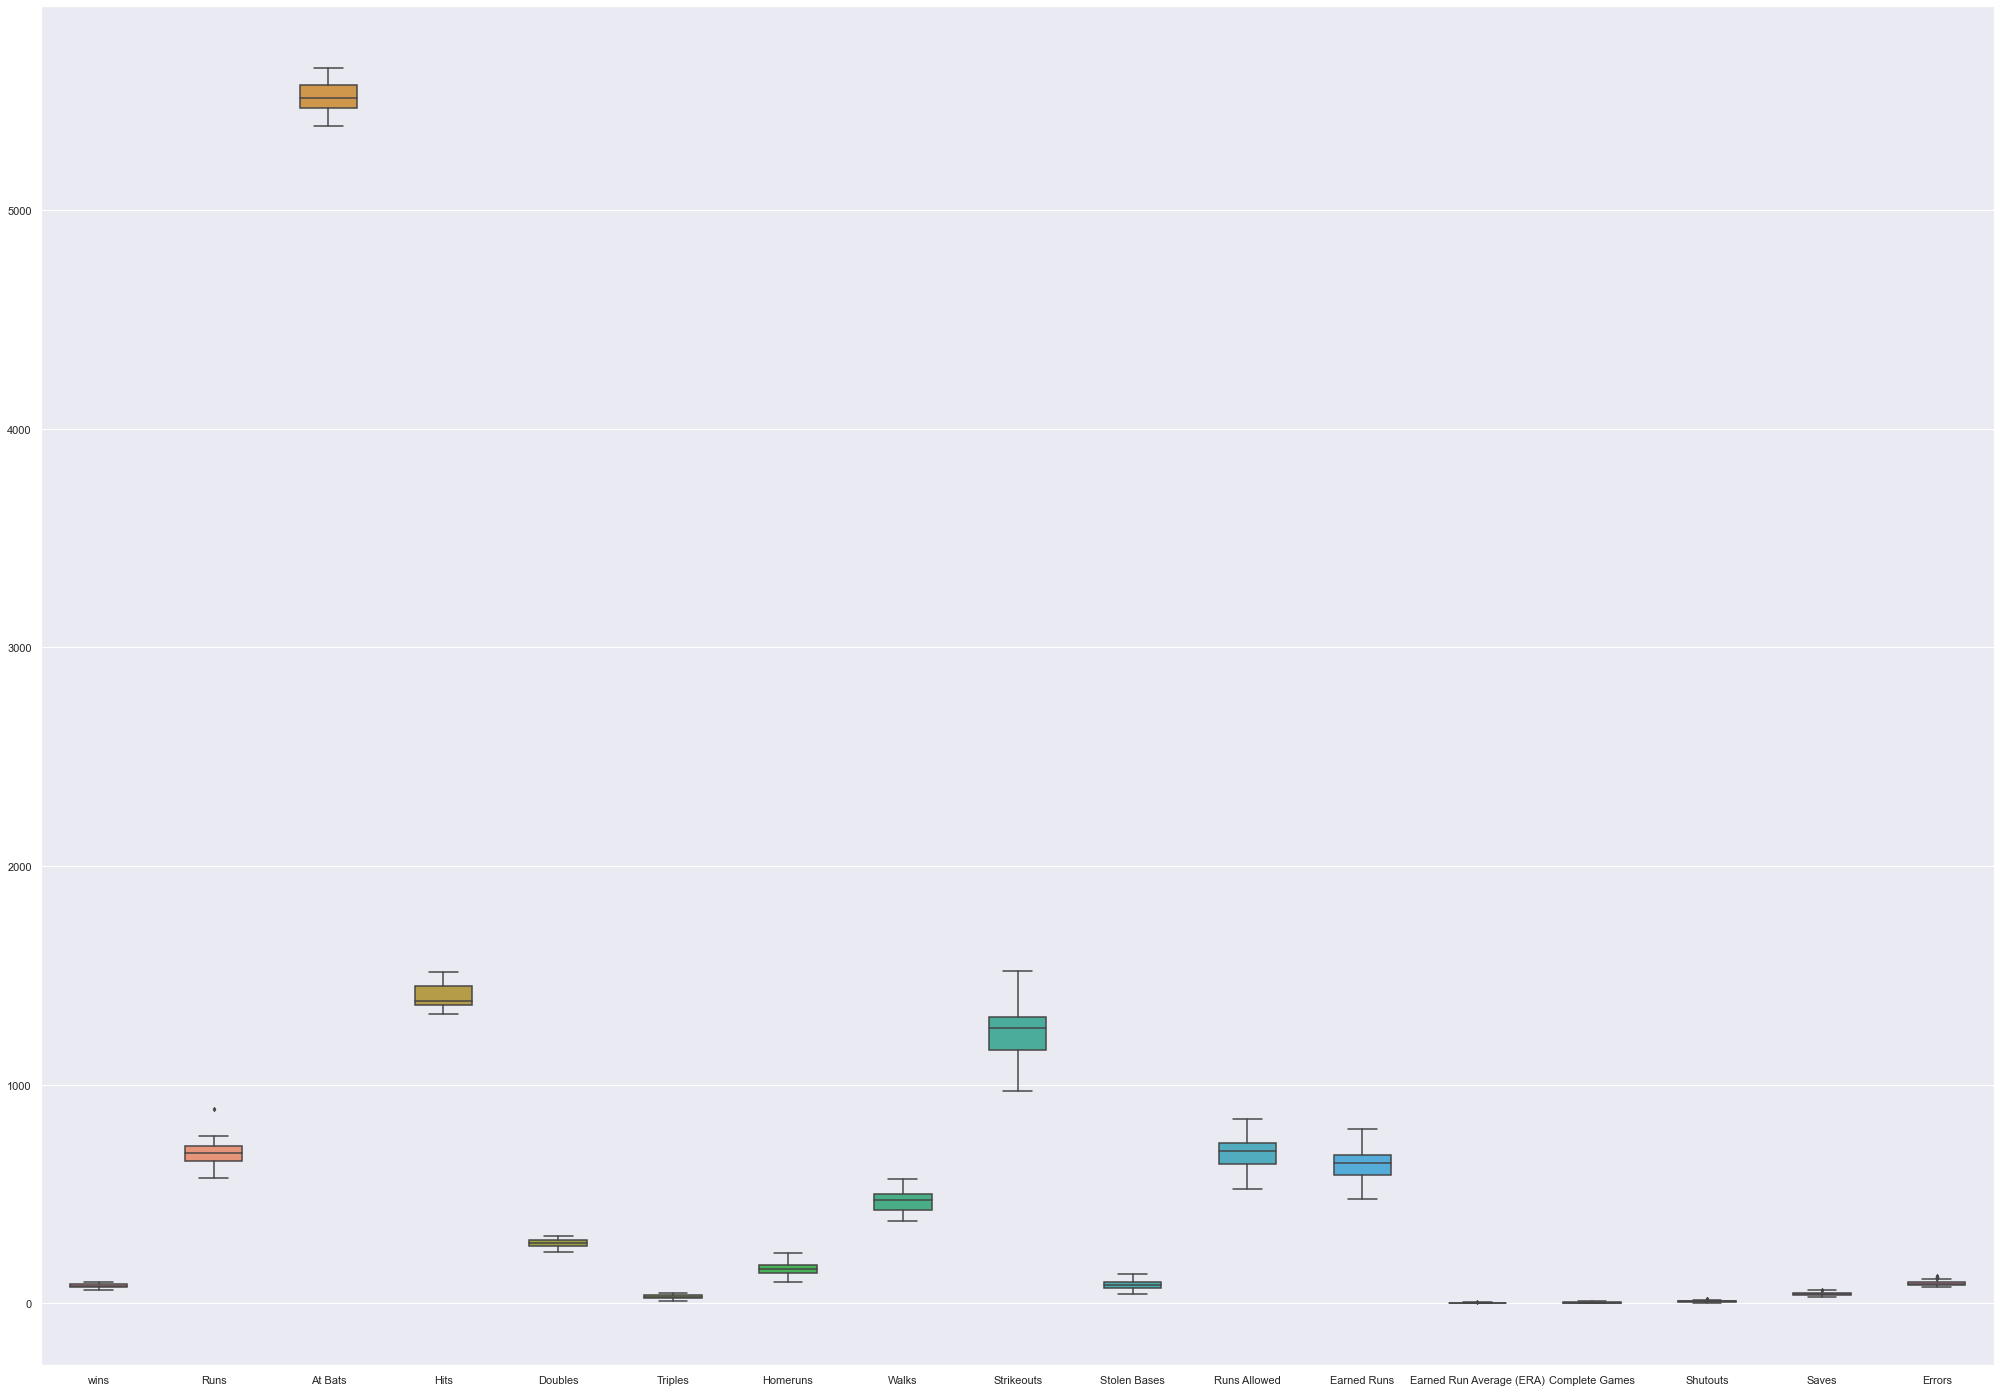

In [15]:
fig ,ax =plt.subplots(figsize=(35,25))
sns.boxplot(data=df,width =0.5,ax=ax ,fliersize=3)

<AxesSubplot:xlabel='wins', ylabel='Runs'>

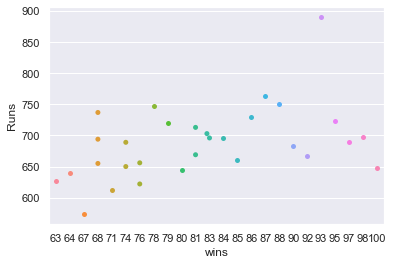

In [16]:
sns.swarmplot(x="wins",y="Runs",data=df)

<AxesSubplot:xlabel='wins', ylabel='At Bats'>

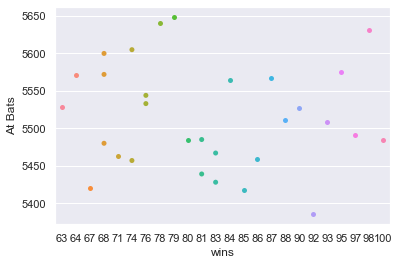

In [17]:
sns.swarmplot(x="wins",y="At Bats",data=df)

<AxesSubplot:xlabel='wins', ylabel='Hits'>

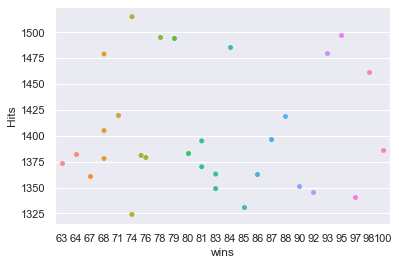

In [18]:
sns.swarmplot(x="wins",y="Hits",data=df)

<AxesSubplot:xlabel='wins', ylabel='Doubles'>

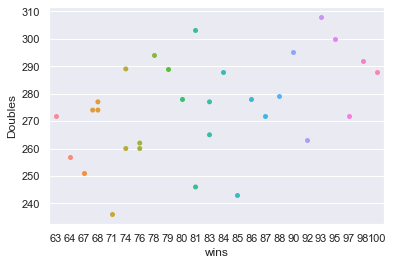

In [19]:
sns.swarmplot(x="wins",y="Doubles",data=df)

<AxesSubplot:xlabel='wins', ylabel='Triples'>

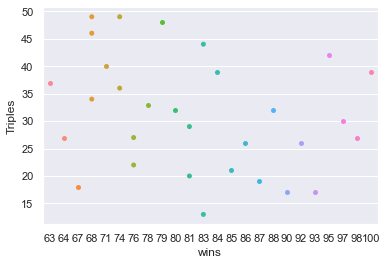

In [20]:
sns.swarmplot(x="wins",y="Triples",data=df)

<AxesSubplot:xlabel='wins', ylabel='Homeruns'>

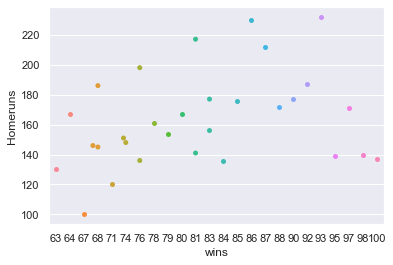

In [21]:
sns.swarmplot(x="wins",y="Homeruns",data=df)

<AxesSubplot:xlabel='wins', ylabel='Walks'>

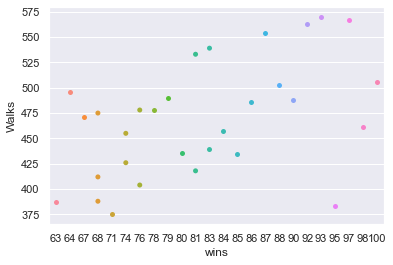

In [22]:
sns.swarmplot(x="wins",y="Walks",data=df)

<AxesSubplot:xlabel='wins', ylabel='Strikeouts'>

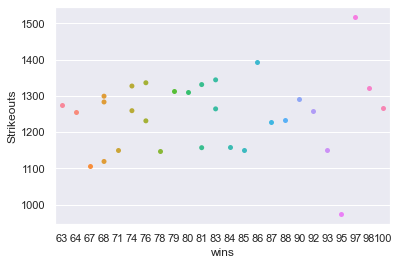

In [23]:
sns.swarmplot(x="wins",y="Strikeouts",data=df)

<AxesSubplot:xlabel='wins', ylabel='Stolen Bases'>

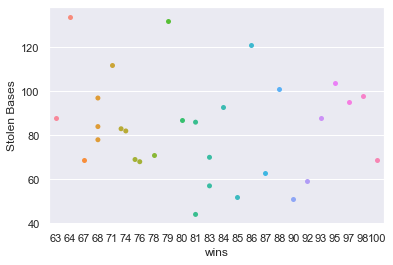

In [24]:
sns.swarmplot(x="wins",y="Stolen Bases",data=df)

<AxesSubplot:xlabel='wins', ylabel='Runs Allowed'>

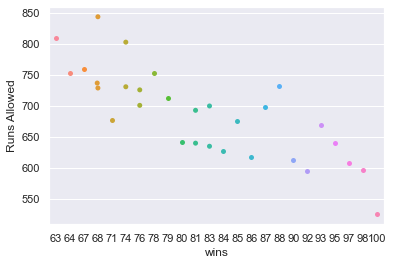

In [25]:
sns.swarmplot(x="wins",y="Runs Allowed",data=df)

<AxesSubplot:xlabel='wins', ylabel='Earned Runs'>

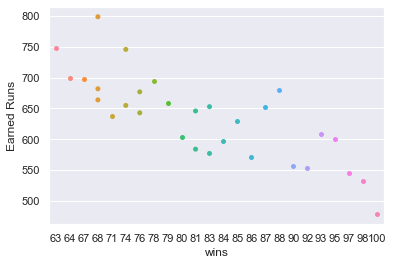

In [26]:
sns.swarmplot(x="wins",y="Earned Runs",data=df)

<AxesSubplot:xlabel='wins', ylabel='Earned Run Average (ERA)'>

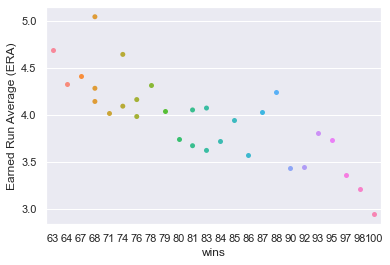

In [27]:
sns.swarmplot(x="wins",y="Earned Run Average (ERA)",data=df)

<AxesSubplot:xlabel='wins', ylabel='Shutouts'>

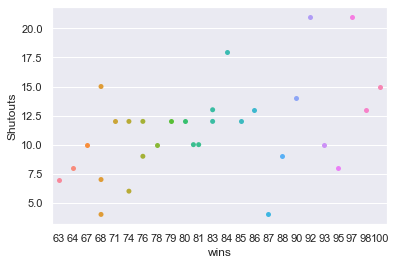

In [28]:
sns.swarmplot(x="wins",y="Shutouts",data=df)

<AxesSubplot:xlabel='wins', ylabel='Saves'>

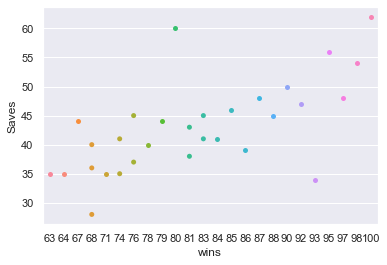

In [29]:
sns.swarmplot(x="wins",y="Saves",data=df)

<AxesSubplot:xlabel='wins', ylabel='Errors'>

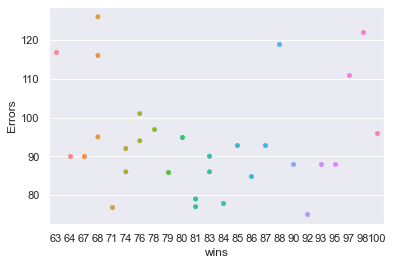

In [30]:
sns.swarmplot(x="wins",y="Errors",data=df)

In [31]:
x= df.drop(columns=['wins'])
y=df['wins']

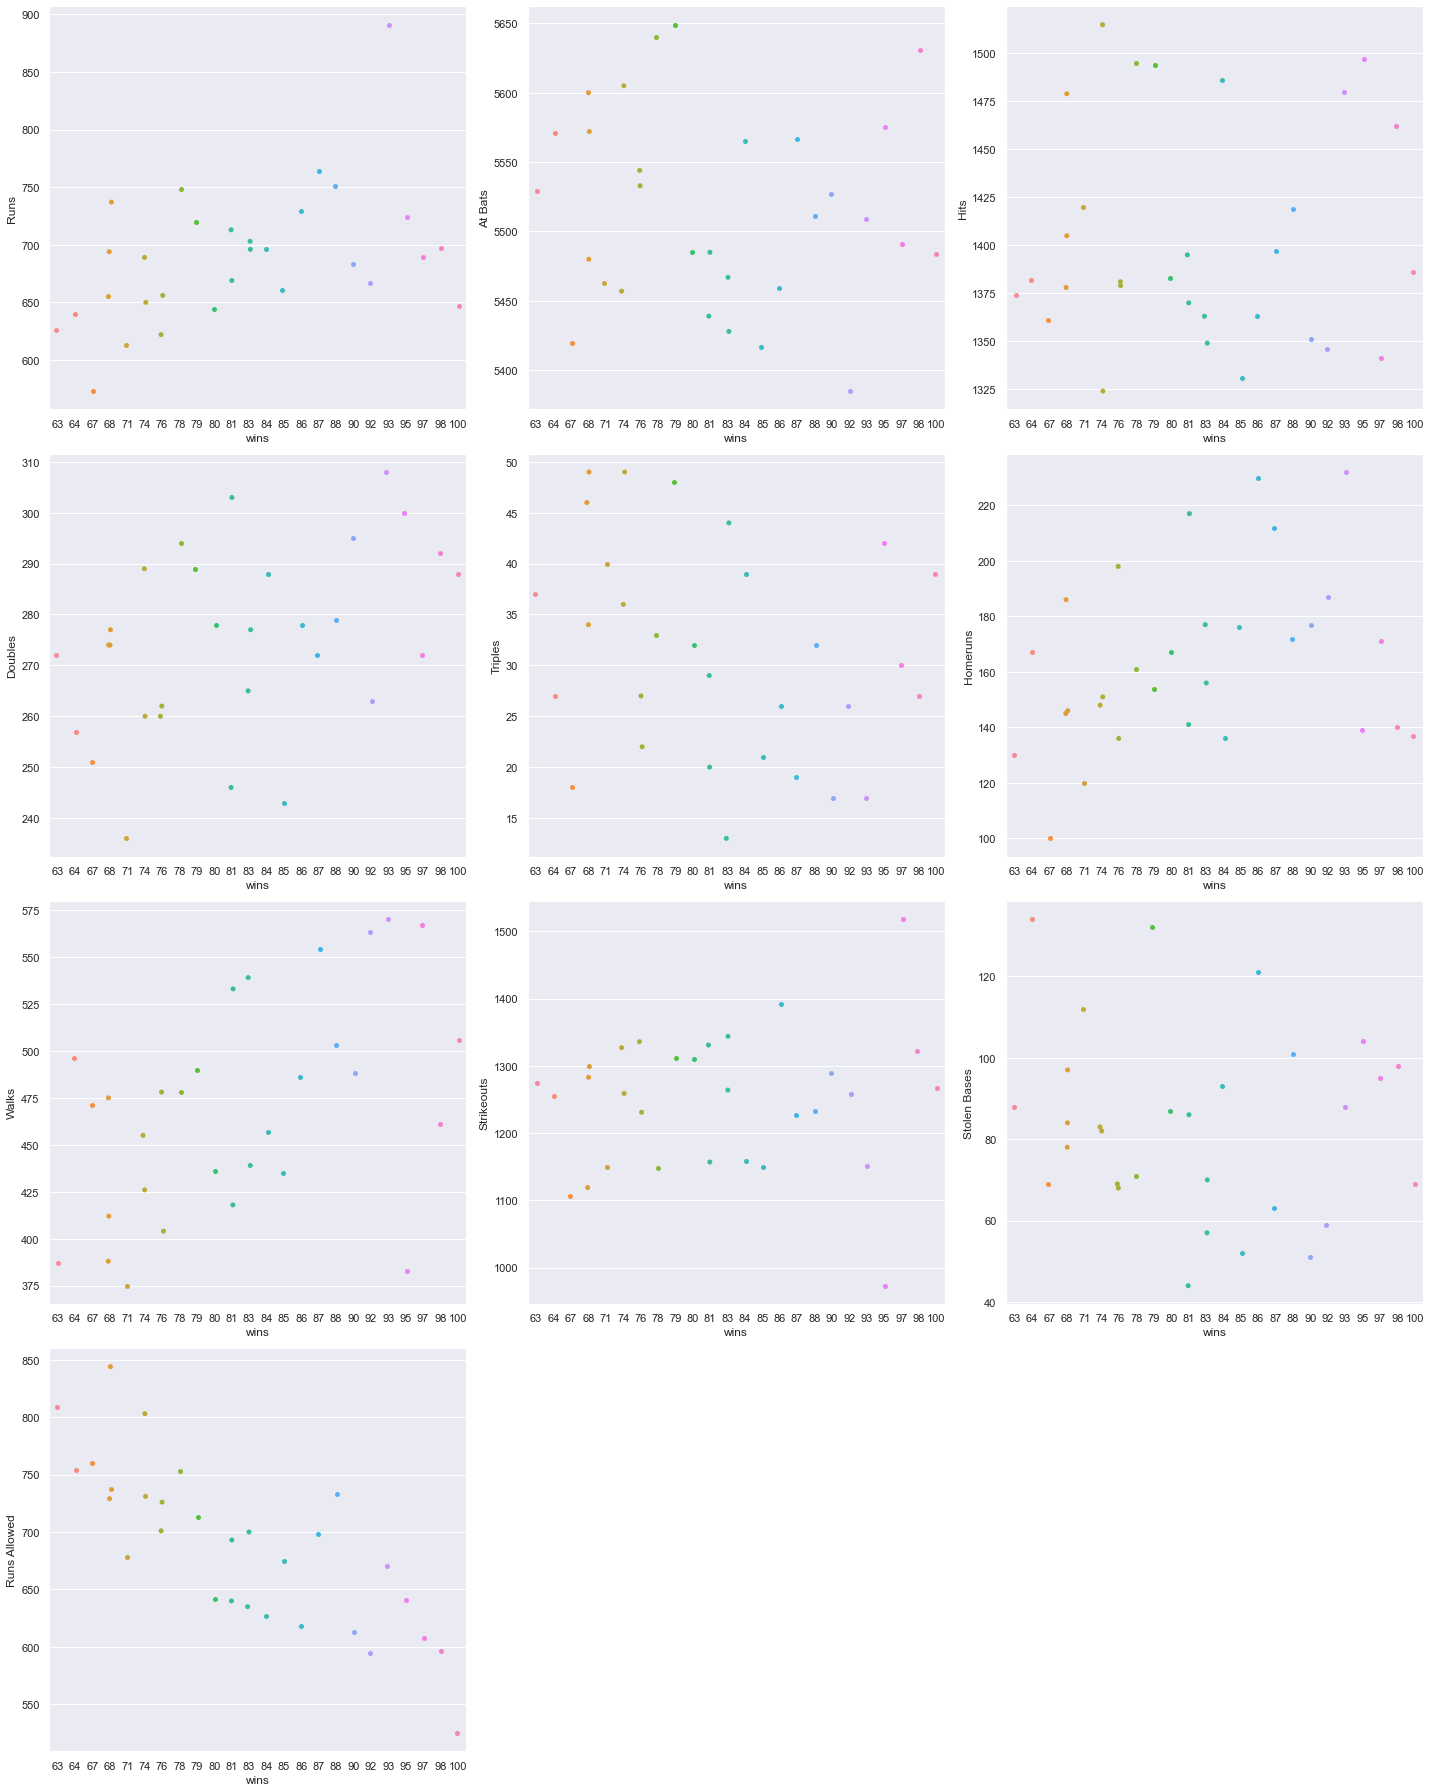

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber <=10:
      ax=plt.subplot(4,3,plotnumber)
      sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

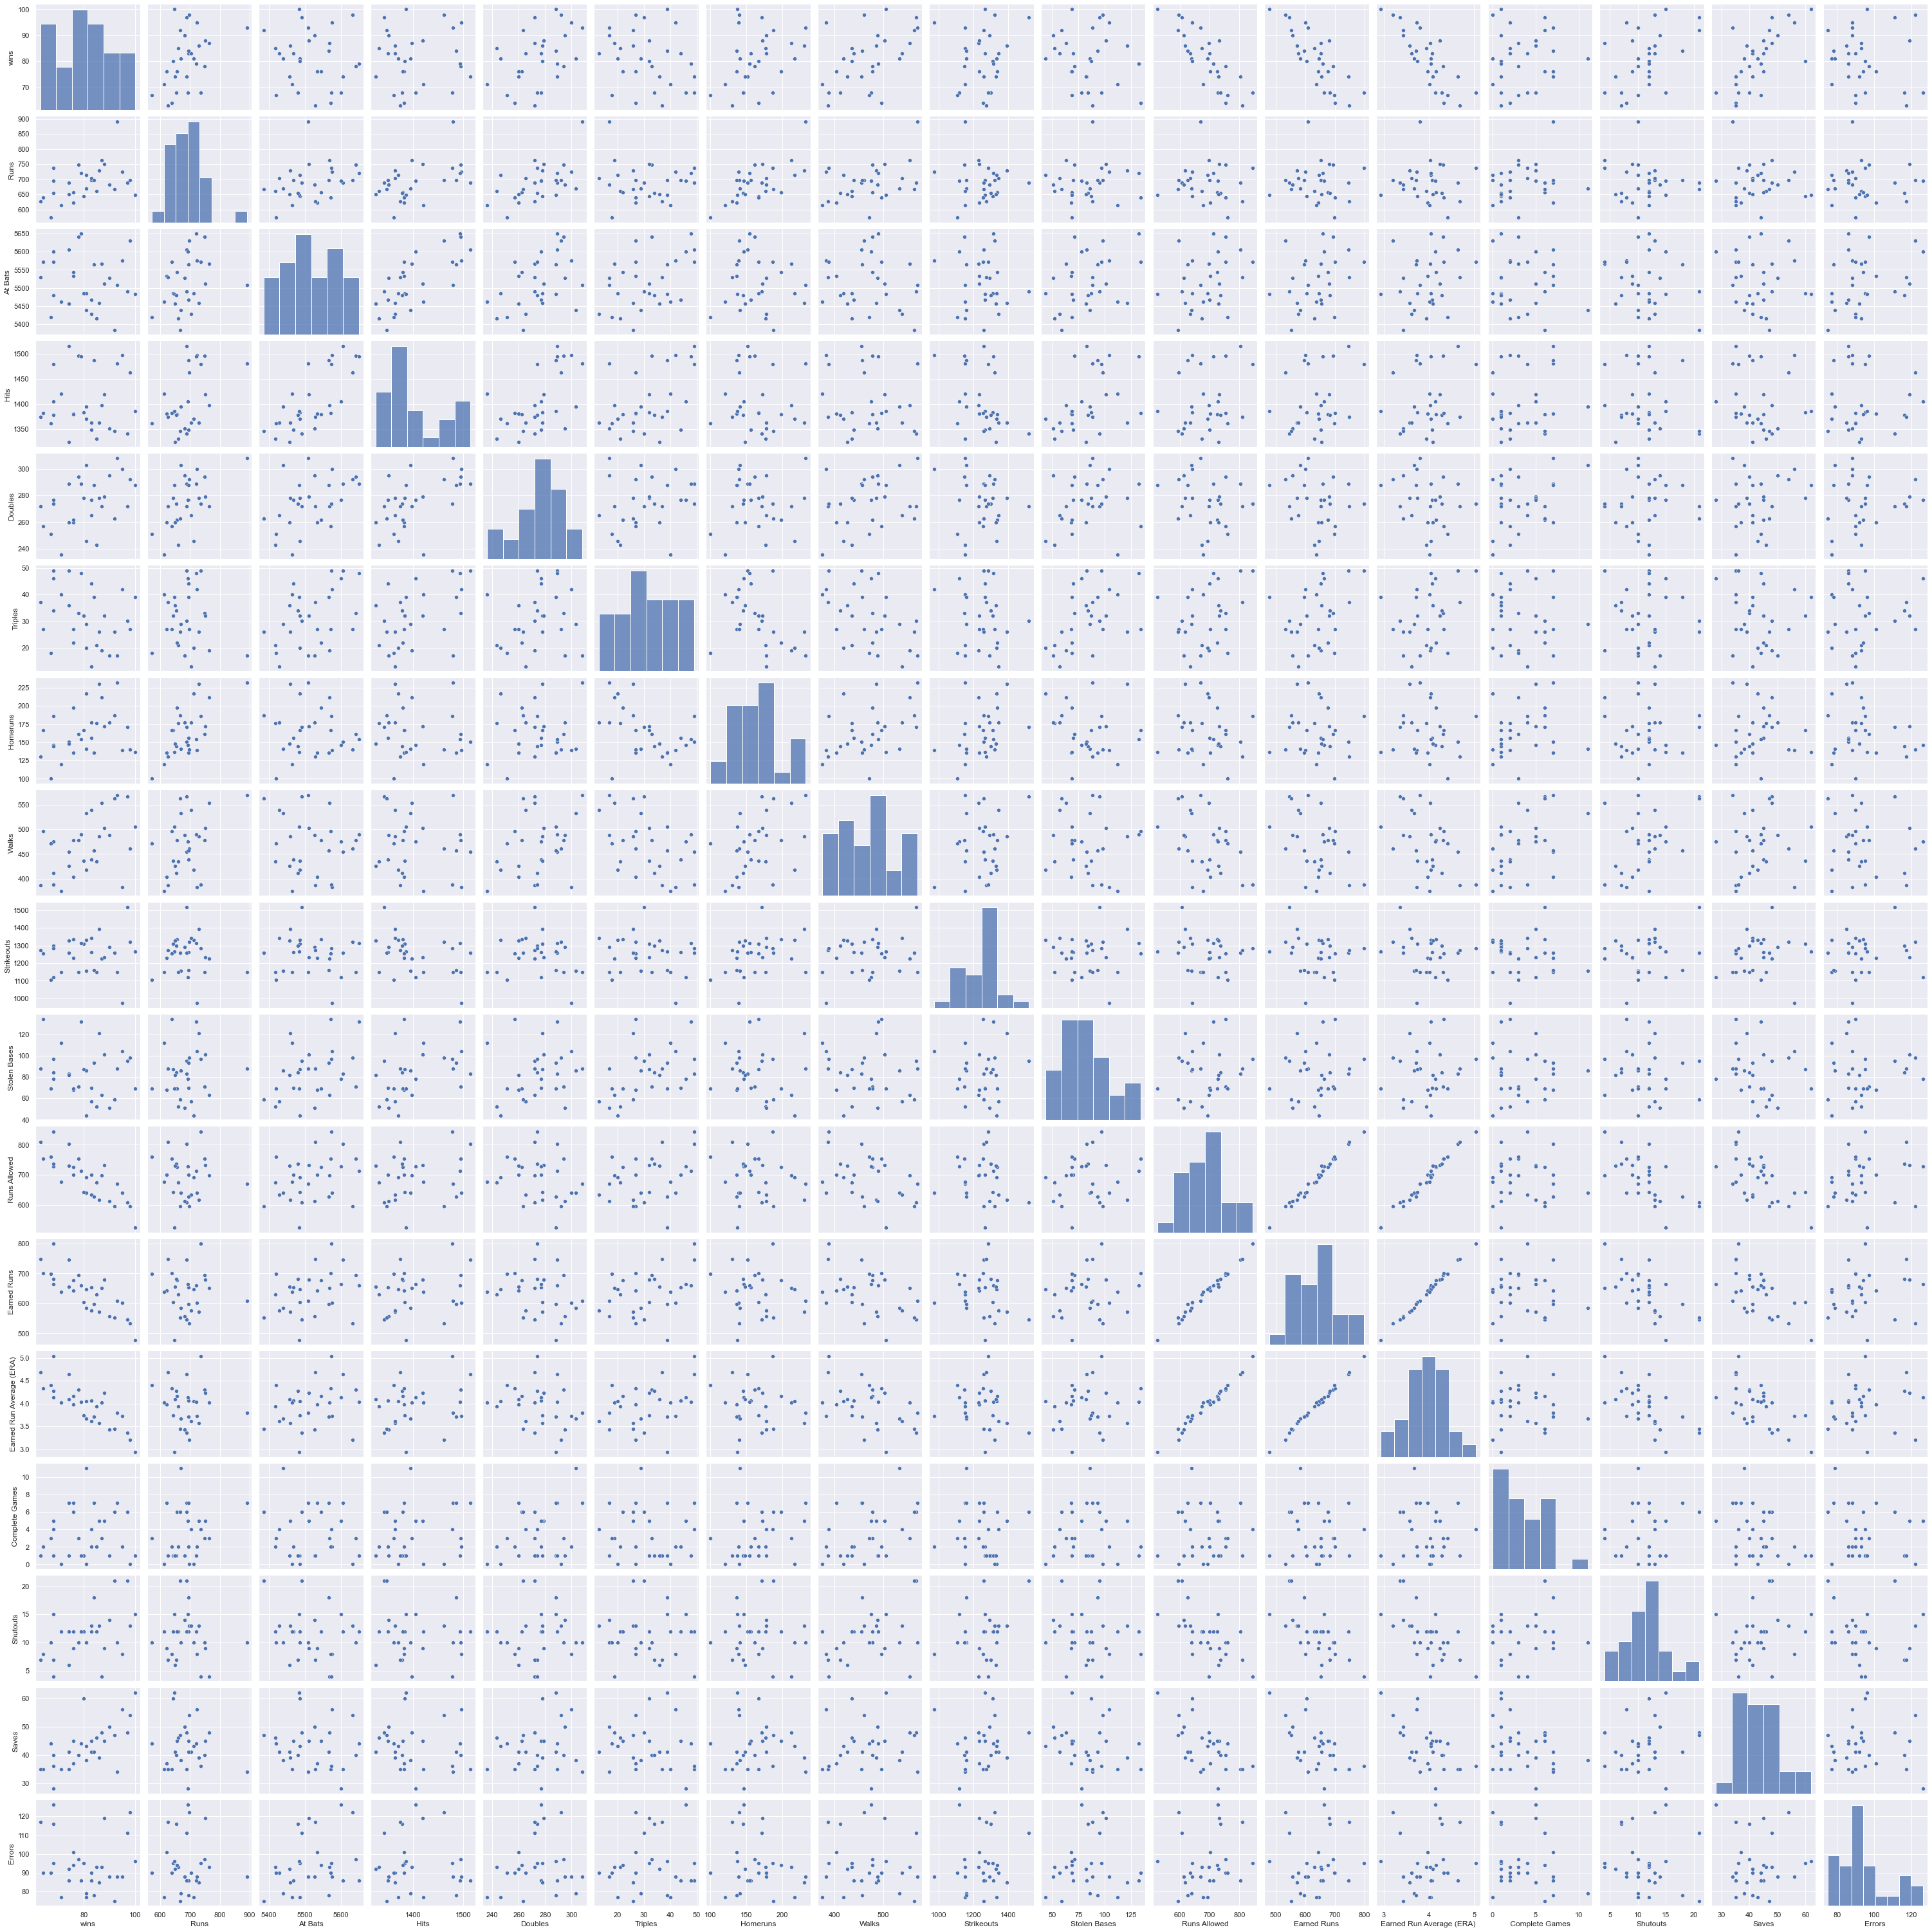

In [33]:
#Method 1
sns.pairplot(df)

<AxesSubplot:>

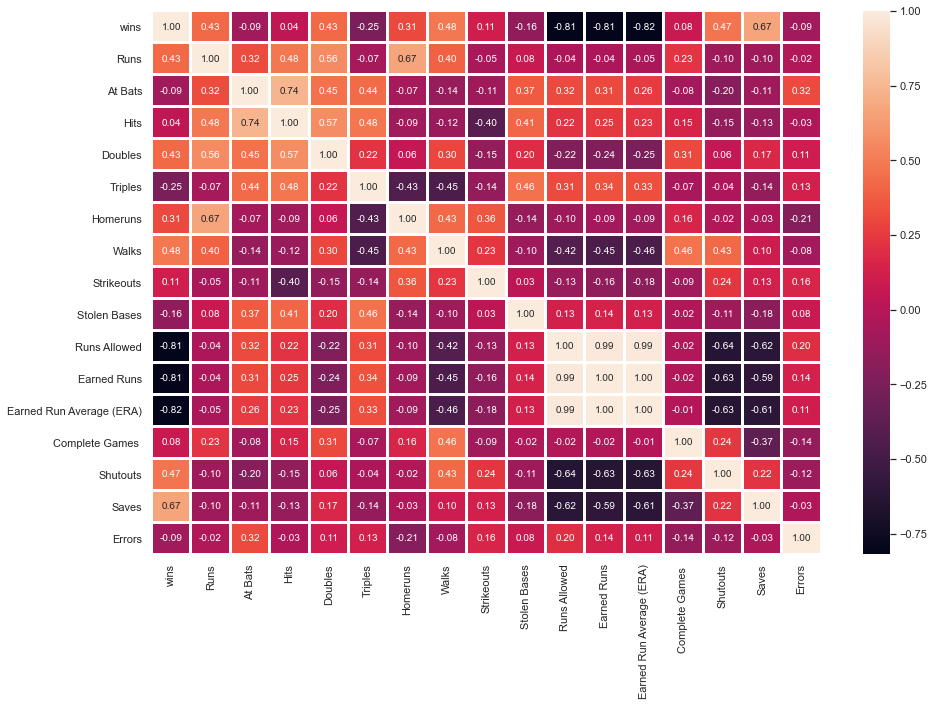

In [34]:
#Method 2
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [35]:
df.corr()

,wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [36]:
#Import Model libraries:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [37]:
X = df.drop('wins', axis=1)
y = df['wins']

In [38]:
feature_cols=df.columns[:17]
 
X=df[feature_cols]

result_cols= df.columns[1:]
#result_cols= ['sales']
Y=df[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18, 17)
(18, 16)
(12, 17)
(12, 16)


In [39]:

lnrg = LinearRegression()
lnrg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [-2.95585778e-12  0.00000000e+00  2.95585778e-12 -1.76214598e-12
  1.76214598e-12  3.41060513e-12 -3.06954462e-12 -2.50111043e-12
 -5.08748599e-12  2.16004992e-12 -3.97903932e-12  1.66977543e-13
  3.68594044e-14  2.00728323e-13 -4.59010607e-12  3.83693077e-13]
linear regression coefficient         =>  [[-7.05538975e-15  1.00000000e+00  7.24993509e-16 -1.32060738e-15
  -2.59249091e-16 -2.79196328e-15  4.34235439e-16 -2.01347956e-16
   1.90419679e-16  2.17990462e-15  3.84689773e-15 -1.39383751e-14
   1.51905090e-12  2.41546025e-14  1.56640174e-14  1.16370203e-14
  -2.41135550e-15]
 [-3.77807922e-15  8.79677623e-16  1.00000000e+00 -1.40254809e-15
  -1.01755456e-15 -1.70810270e-15 -4.41035555e-16 -6.37434638e-17
   7.82151934e-16  9.97669840e-16  2.93843172e-15 -1.05464630e-14
   1.05083186e-12  1.66368206e-14  6.08307768e-15  7.31444599e-15
  -1.91711596e-15]
 [ 2.60169894e-15 -3.25074488e-16 -5.57336025e-16  1.00000000e+00
   6.90784832e-16 -1.27

In [40]:

score=0
for i in range(0,1000):
    feature_cols = ['wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', ' Complete Games ', 'Shutouts', 'Saves',
       'Errors']  
    X=df[feature_cols]
    Y=df.wins
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

2.56943895734637e-14

In [41]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=3,scoring='f1_macro')
print('F1-score=',score)
print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=3)

print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

F1-score= [0. 0. 0.]
Mean Scores 0.0
Standard deviation 0.0


NameError: name 'cross_val_predict' is not defined

In [42]:
from sklearn import linear_model
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(30,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)        

max r2 score corresponding to  165  is  0.9343338116280446


In [43]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.9594325587184218


In [45]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0
{'alpha': 0}


In [46]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 0.13175253  0.00728741 -0.01067308 -0.13165252  0.01123923 -0.05709399
 -0.02698162  0.00216454 -0.00236825  0.11621023 -0.18688488 -0.24998658
  0.97347391  0.3345278   0.78952966 -0.02791895]
0.7698542211976708


In [50]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.45805077232058156

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=288)

In [53]:
pred=lr.predict(x_test)
print("Predicted wins:",pred)
print("actual wins",y_test)

Predicted wins: [86.39282173 67.78159197 80.31241484 85.7156632  67.03209049 92.88378184]
actual wins 6     87
19    64
7     81
26    84
23    67
0     95
Name: wins, dtype: int64
